# Proyek Analisis Data: Bike Sharing Dataset


*   Nama: Kirana Alyssa Putri
*   Email: kiranaalyssa.putri@gmail.com
*   ID Dicoding: kiranaalyssa





## Menentukan Pertanyaan Bisnis
1. Bagaimana pola tren sewa sepeda per bulan selama setahun?
2. Bagaimana distribusi pengguna sepeda di hari libur dibandingkan dengan hari kerja?
3. Bagaimana perbandingan jumlah pengguna Casual dan Registered di hari kerja?
4. Musim mana yang memiliki jumlah pengguna sepeda terbanyak?
5. Bagaimana perbedaan jumlah sewa sepeda antara pengguna Casual dan Registered berdasarkan kondisi cuaca?
6. Seberapa besar pengaruh kecepatan angin terhadap jumlah penyewa sepeda di hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight**

-Terjemahan Data Dictionary Bike Sharing-

* instant: indeks pencatatan
* dteday: tanggal
* season: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
* yr: tahun (0: 2011, 1: 2012)
* mnth: bulan (1 hingga 12)
* holiday: hari tersebut adalah hari libur atau tidak
* weekday: hari dalam seminggu
* workingday: jika hari tersebut bukan akhir pekan atau hari libur nilainya 1, jika tidak nilainya 0
* weathersit:
  1. Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan
  2. Kabut + Berawan, Kabut + Awan terputus, Kabut + Sedikit awan, Kabut
  3. Salju ringan, Hujan ringan + Badai + Awan terputus, Hujan ringan + Awan terputus
  4.Hujan deras + Hujan es + Badai + Kabut, Salju + Kabut
* temp: Suhu normalisasi dalam Celsius.
* atemp: Suhu Celsius yang dinormalisasi.
* hum: Kelembapan yang dinormalisasi.
* windspeed: Kecepatan angin yang dinormalisasi.
* casual: jumlah pengguna kasual
* registered: jumlah pengguna terdaftar
* cnt: jumlah total penyewaan sepeda termasuk pengguna kasual dan terdaftar

### Assesing Data

In [3]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
bike_sharing_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
print("Jumlah duplikasi: ", bike_sharing_df.duplicated().sum())
bike_sharing_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**

Berikut adalah hasil Assesing Data pada tabel dataset bike-sharing:

1. Tipe data -> dteday seharusnya datetime (Jadi ubah tipe data object menjadi datetime)

2. Missing value -> Tidak ada

3. Duplicate data -> Tidak ada

4. Inaccurate value -> Tidak ada

### Cleaning Data

In [6]:
# Ubah tipe data 'object' pada dteday menjadi 'datetime'
bike_sharing_df['dteday'] = pd.to_datetime(bike_sharing_df['dteday'])

In [7]:
#Cek tipe data setelah dikonversi
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
# Simpan dataset yang sudah dibersihkan sebagai file CSV
# bike_sharing_df.to_csv('clean_df.csv', index=False)

**Insight:**

Melakukan perubahan tipe data untuk 'dteday' menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore ...


In [9]:
bike_sharing_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight** yang didapatkan secara umum:

1. Rata-rata Penyewa Kasual (Casual) dan Terdaftar (Registered):
   Rata-rata Pengguna Kasual: 848.18
   Rata-rata Pengguna Terdaftar: 3656.17
   
   Kesimpulan: Terlihat bahwa rata-rata pengguna terdaftar jauh lebih tinggi dibandingkan dengan pengguna kasual. Ini menunjukkan bahwa program berbagi
   sepeda mungkin lebih diminati oleh pengguna yang terdaftar, yang dapat dioptimalkan dengan promosi atau diskon.

2. Rata-rata Total Sewa Sepeda (cnt):
   Rata-rata: 4504.35
   
   Kesimpulan: Secara keseluruhan, ada sekitar 4504 penyewaan sepeda per hari. Ini menunjukkan bahwa sistem berbagi sepeda cukup aktif dan populer.

In [10]:
# 1. Jumlah keseluruhan pengguna bike-sharing
total_users = bike_sharing_df['casual'].sum() + bike_sharing_df['registered'].sum()
print(f"Jumlah keseluruhan pengguna bike-sharing: {total_users}")

Jumlah keseluruhan pengguna bike-sharing: 3292679


In [11]:
total_casual = bike_sharing_df['casual'].sum()
total_registered = bike_sharing_df['registered'].sum()

print(f"Jumlah total pengguna casual: {total_casual}")
print(f"Jumlah total pengguna registered: {total_registered}")

Jumlah total pengguna casual: 620017
Jumlah total pengguna registered: 2672662


In [12]:
#2. Total sepeda yang disewa per tahun
total_rentals_per_year = bike_sharing_df.groupby(bike_sharing_df['yr'].map({0: 2011, 1: 2012}))['cnt'].sum().reset_index()
total_rentals_per_year.columns = ['Tahun', 'Total Sewa']
print("Total sepeda yang disewa per tahun:")
total_rentals_per_year

Total sepeda yang disewa per tahun:


,Tahun,Total Sewa
0,2011,1243103
1,2012,2049576


In [13]:
# 3. Jumlah penyewa sepeda dalam sehari
daily_rentals = bike_sharing_df.groupby('dteday')['cnt'].sum().reset_index()
daily_rentals.columns = ['Tanggal', 'Jumlah Penyewa']
print("Jumlah penyewa sepeda dalam sehari:")
(daily_rentals)

Jumlah penyewa sepeda dalam sehari:


,Tanggal,Jumlah Penyewa
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [14]:
# 4. Musim dengan penyewa sepeda terbanyak
seasonal_rentals = bike_sharing_df.groupby('season')['cnt'].sum().reset_index()
seasonal_rentals.columns = ['Musim', 'Total Sewa']
print("Musim dengan jumlah penyewa sepeda terbanyak:")
(seasonal_rentals)

Musim dengan jumlah penyewa sepeda terbanyak:


,Musim,Total Sewa
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [15]:
# 5. Perbandingan pengguna sewa sepeda pada hari kerja dan hari libur

# Menghitung total penyewa sepeda pada hari kerja
workingday_rentals = bike_sharing_df.groupby(bike_sharing_df['workingday'])['cnt'].sum().reset_index()
workingday_rentals.columns = ['Hari Kerja (0: Tidak, 1: Ya)', 'Total Sewa']

# Menghitung total penyewa sepeda pada hari libur (holiday = 1)
holiday_rentals = bike_sharing_df.groupby(bike_sharing_df['holiday'])['cnt'].sum().reset_index()
holiday_rentals.columns = ['Hari Libur (0: Tidak, 1: Ya)', 'Total Sewa']

# Menampilkan hasil
print("Perbandingan pengguna sewa sepeda pada hari kerja:")
print(workingday_rentals)
print("\nPerbandingan pengguna sewa sepeda pada hari libur:")
print(holiday_rentals)


Perbandingan pengguna sewa sepeda pada hari kerja:
   Hari Kerja (0: Tidak, 1: Ya)  Total Sewa
0                             0     1000269
1                             1     2292410

Perbandingan pengguna sewa sepeda pada hari libur:
   Hari Libur (0: Tidak, 1: Ya)  Total Sewa
0                             0     3214244
1                             1       78435


In [16]:
# 6. Pengguna sewa sepeda berdasarkan kondisi cuaca
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung total penyewa sepeda
weather_rentals = bike_sharing_df.groupby('weathersit')['cnt'].agg('sum').reset_index()
weather_rentals.columns = ['Kondisi Cuaca', 'Total Sewa']

# Menampilkan hasil
print("Pengguna sepeda berdasarkan kondisi cuaca:")
print(weather_rentals)


Pengguna sepeda berdasarkan kondisi cuaca:
   Kondisi Cuaca  Total Sewa
0              1     2257952
1              2      996858
2              3       37869


In [17]:
# Cek apakah ada data dengan kondisi cuaca 4
cuaca_4 = bike_sharing_df[bike_sharing_df['weathersit'] == 4]

# Menampilkan data yang memiliki kondisi cuaca 4
print(f"Jumlah data dengan kondisi cuaca 4: {len(cuaca_4)}")
print(cuaca_4)


Jumlah data dengan kondisi cuaca 4: 0
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [18]:
# 7. Penyewa sepeda  casual dan registered pada hari kerja
# Filter data untuk hari kerja (workingday == 1)
workingday_rentals = bike_sharing_df[bike_sharing_df['workingday'] == 1]

# Menghitung total jumlah penyewa casual dan registered pada hari kerja
total_casual_workingday = workingday_rentals['casual'].sum()
total_registered_workingday = workingday_rentals['registered'].sum()

# Menampilkan hasil
print("Pada hari kerja, jumlah total pengguna casual dan registered:")
print(f"Jumlah Casual: {total_casual_workingday}")
print(f"Jumlah Registered: {total_registered_workingday}")

Pada hari kerja, jumlah total pengguna casual dan registered:
Jumlah Casual: 303285
Jumlah Registered: 1989125


In [19]:
# 8. Perkembangan penyewa sepeda casual dan registered per tahun berdasarkan bulan dan tipe pengguna
# Filter data untuk bulan Januari hingga Mei pada tahun 2011
rentals_2011 = bike_sharing_df[(bike_sharing_df['yr'] == 0) & (bike_sharing_df['mnth'] >= 1) & (bike_sharing_df['mnth'] <= 5)]
rentals_by_month_2011 = rentals_2011.groupby('mnth')[['casual', 'registered']].sum()

# Filter data untuk bulan Januari hingga Mei pada tahun 2012
rentals_2012 = bike_sharing_df[(bike_sharing_df['yr'] == 1) & (bike_sharing_df['mnth'] >= 1) & (bike_sharing_df['mnth'] <= 5)]
rentals_by_month_2012 = rentals_2012.groupby('mnth')[['casual', 'registered']].sum()

# Menampilkan hasil
print("Perkembangan penyewa sepeda  casual dan registered dari Januari hingga Mei tahun 2011:")
print(rentals_by_month_2011)

print("\nPerkembangan penyewa sepeda  casual dan registered dari Januari hingga Mei tahun 2012:")
print(rentals_by_month_2012)

Perkembangan penyewa sepeda  casual dan registered dari Januari hingga Mei tahun 2011:
      casual  registered
mnth                    
1       3073       35116
2       6242       41973
3      12826       51219
4      22346       72524
5      31050      104771

Perkembangan penyewa sepeda  casual dan registered dari Januari hingga Mei tahun 2012:
      casual  registered
mnth                    
1       8969       87775
2       8721       94416
3      31618      133257
4      38456      135768
5      44235      151630


Berdasarkan hasil Exploratory Data Analysis (EDA) dari data bike-sharing, berikut adalah beberapa **insight** berharga:

1. Peningkatan Pengguna: Jumlah total penyewa sepeda meningkat dari 1,24 juta di tahun 2011 menjadi 2,05 juta di tahun 2012, menunjukkan pertumbuhan yang signifikan.

2. Dominasi Pengguna Registered: Pengguna registered mendominasi sistem bike-sharing, dengan 2,67 juta penyewaan dibandingkan 620 ribu dari pengguna casual. ni berdampak positif karena menunjukkan banyak pengguna yang mendaftar dan memanfaatkan kelebihan yang ditawarkan oleh sistem bike-sharing, seperti kemudahan akses, tarif yang lebih terjangkau, atau fitur tambahan lainnya.

3. Musim Puncak Penyewaan: Musim gugur mencatat jumlah penyewaan tertinggi (1,06 juta), diikuti oleh musim panas (918 ribu).

4. Hari Kerja vs Hari Libur: Sebagian besar penyewaan terjadi pada hari kerja (2,29 juta), dibandingkan dengan 1 juta pada hari libur.

5. Cuaca: Kondisi cuaca cerah (kategori 1) menghasilkan jumlah penyewaan tertinggi (2,25 juta), sedangkan cuaca berkabut atau hujan ringan menurunkan jumlah penyewaan menjadi 996 ribu dan 37 ribu.

Secara keseluruhan, data menunjukkan bahwa mayoritas penyewaan terjadi di hari kerja, dengan pengguna registered yang lebih aktif, terutama dalam cuaca cerah dan musim gugur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pola tren sewa sepeda per bulan selama setahun? (Line Chart)

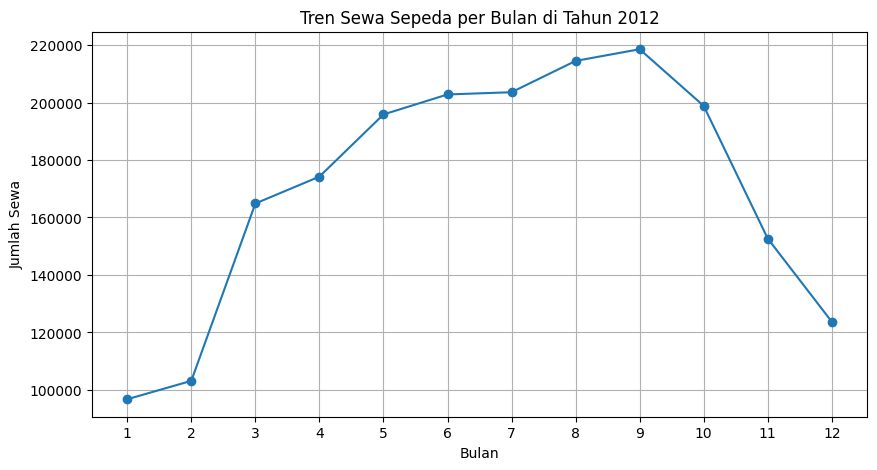

In [20]:
# 1. Tren sewa sepeda per bulan dalam setahun

monthly_rentals_2012 = bike_sharing_df[bike_sharing_df['yr'] == 1].groupby('mnth')['cnt'].sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_rentals_2012.index, monthly_rentals_2012.values, marker='o')
plt.title('Tren Sewa Sepeda per Bulan di Tahun 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.xticks(monthly_rentals_2012.index)
plt.grid()
plt.show()

### Pertanyaan 2:

 Bagaimana distribusi pengguna sepeda di hari libur dibandingkan dengan hari kerja? (Pie Chart)

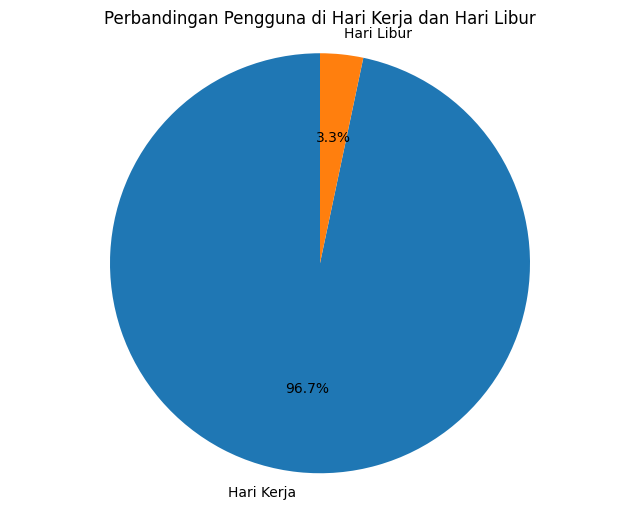

In [21]:
# 2. Perbandingan jumlah pengguna di hari libur dan di hari biasa

# Menghitung total jumlah penyewa di hari kerja dan hari libur
total_rentals_workingday = bike_sharing_df[bike_sharing_df['workingday'] == 1]['cnt'].sum()
total_rentals_holiday = bike_sharing_df[bike_sharing_df['holiday'] == 1]['cnt'].sum()

# Data untuk pie chart
labels = ['Hari Kerja', 'Hari Libur']
sizes = [total_rentals_workingday, total_rentals_holiday]


# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Pengguna di Hari Kerja dan Hari Libur')
plt.axis('equal')  # Equal aspect ratio memastikan pie chart berbentuk lingkaran
plt.show()

### Pertanyaan 3:

Bagaimana perbandingan jumlah pengguna Casual dan Registered di hari kerja? (Pie Chart)

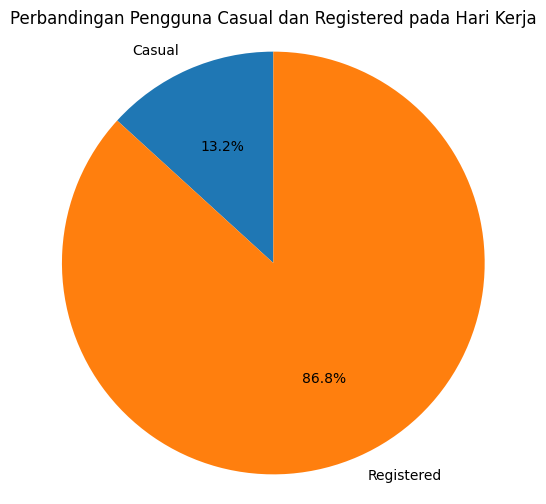

In [22]:
# 3. Perbandingan pengguna Casual dan Registered di Hari Kerja

# Filter data untuk hari kerja
workingday_rentals = bike_sharing_df[bike_sharing_df['workingday'] == 1]

# Hitung total penyewa casual dan registered
total_casual = workingday_rentals['casual'].sum()
total_registered = workingday_rentals['registered'].sum()

# Data untuk Pie Chart
labels = ['Casual', 'Registered']
totals = [total_casual, total_registered]

# Membuat Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(totals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Pengguna Casual dan Registered pada Hari Kerja')
plt.axis('equal')  # Pastikan pie chart berbentuk bulat
plt.show()


### Pertanyaan 4:

Musim mana yang memiliki jumlah pengguna sepeda terbanyak? (Bar Chart)

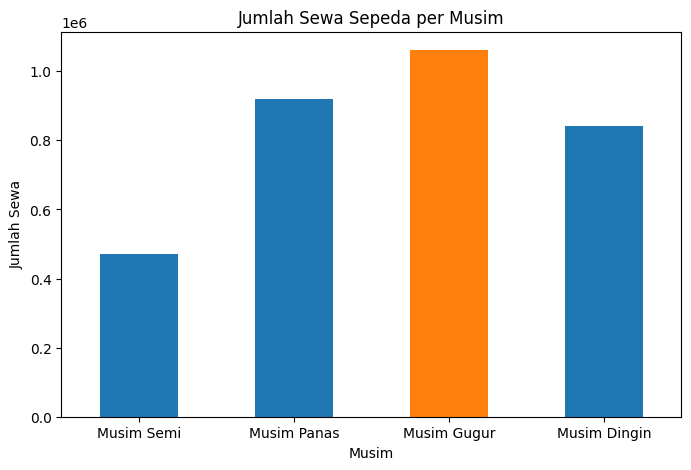

In [23]:
# 4. Pada musim apa yang menghasilkan pengguna sepeda paling banyak?

# Menghitung total sewa per musim
season_rentals = bike_sharing_df.groupby('season')['cnt'].sum()

# Mengganti label musim dengan nama yang sesuai
season_labels = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']

# Membuat Bar Chart dengan warna yang dikustomisasi
plt.figure(figsize=(8, 5))

# Warna biru untuk semua bar
colors = ['C0'] * len(season_rentals)

# Menemukan indeks bar yang memiliki nilai tertinggi
max_index = season_rentals.idxmax()

# Mengubah warna bar tertinggi menjadi oranye
colors[max_index - 1] = 'C1'

# Plot bar dengan warna kustom
season_rentals.plot(kind='bar', color=colors)
plt.title('Jumlah Sewa Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.xticks(ticks=range(len(season_labels)), labels=season_labels, rotation=0)
plt.show()

### Pertanyaan 5:

Bagaimana perbedaan jumlah sewa sepeda antara pengguna Casual dan Registered berdasarkan kondisi cuaca? (Bar Chart)

<Figure size 1000x600 with 0 Axes>

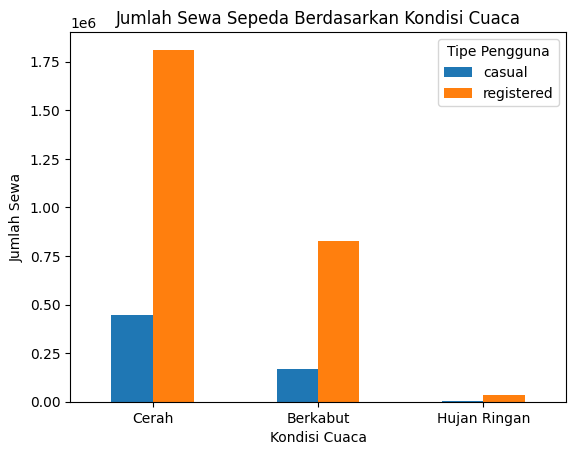

In [24]:
# 5. Perbedaan jumlah sewa sepeda antara pengguna kasual dan terdaftar berdasarkan kondisi cuaca

# Menghitung total sewa berdasarkan kondisi cuaca
weather_rentals = bike_sharing_df.groupby('weathersit')[['casual', 'registered']].sum()

# Mengganti label kondisi cuaca dengan nama yang sesuai
weather_labels = ['Cerah', 'Berkabut', 'Hujan Ringan']

# Membuat Bar Chart
plt.figure(figsize=(10, 6))
weather_rentals.plot(kind='bar', color=['C0', 'C1'])
plt.title('Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sewa')
plt.xticks(ticks=range(len(weather_labels)), labels=weather_labels, rotation=0)
plt.legend(title='Tipe Pengguna')
plt.show()


### Pertanyaan 6:

Seberapa besar pengaruh kecepatan angin terhadap jumlah penyewa sepeda di hari kerja? (Histogram)

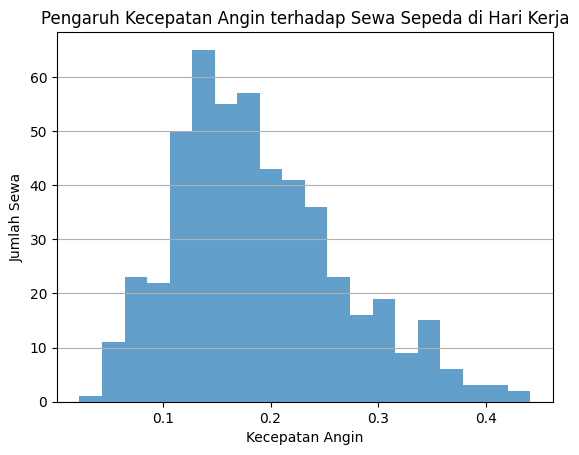

In [25]:
# 6. Pengaruh kecepatan angin terhadap sewa sepeda berdasarkan hari kerja

working_day_rentals = bike_sharing_df[bike_sharing_df['workingday'] == 1]
plt.hist(working_day_rentals['windspeed'], bins=20, alpha=0.7, color='C0')
plt.title('Pengaruh Kecepatan Angin terhadap Sewa Sepeda di Hari Kerja')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sewa')
plt.grid(axis='y')
plt.show()

**Insight:**


1. Bagaimana pola tren sewa sepeda per bulan selama setahun?
Di tahun 2012, pengguna sepeda meningkat pesat dari bulan ke-3 hingga mencapai puncaknya di bulan ke-9, kemungkinan karena cuaca sedang ada di musim panas dan gugur. Setelah itu, terjadi penurunan saat musim dingin tiba.

2. Bagaimana distribusi pengguna sepeda di hari libur dibandingkan dengan hari kerja?
Sebagian besar penyewaan sepeda (96.7%) terjadi di hari kerja, menunjukkan sepeda lebih sering digunakan untuk aktivitas rutin sehari-hari seperti berangkat sekolah dan kantor.

3. Bagaimana perbandingan jumlah pengguna Casual dan Registered di hari kerja?
Sebanyak 86.8% penyewa adalah pengguna terdaftar (*registered*), menunjukkan banyak yang memilih mendaftar untuk kemudahan akses dan manfaat sistem *bike-sharing* ini.

4. Musim mana yang memiliki jumlah pengguna sepeda terbanyak?
Musim gugur memiliki jumlah pengguna terbanyak, diikuti oleh musim panas, karena cuacanya lebih nyaman untuk bersepeda.

5. Bagaimana perbedaan jumlah sewa sepeda antara pengguna Casual dan Registered berdasarkan kondisi cuaca?
Pengguna sepeda paling banyak saat cuaca cerah, dan hampir tidak ada penyewaan dalam kondisi cuaca ekstrem seperti hujan lebat (Walapun data ada di dictionary namun tidak ada data pengguna *bike sharing* di cuaca ekstrem).

6. Seberapa besar pengaruh kecepatan angin terhadap jumlah penyewa sepeda di hari kerja?
Sewa sepeda lebih banyak terjadi saat kecepatan angin rendah, karena lebih aman dan nyaman bagi pengguna.

## Conclusion

Dari hasil analisis data sistem bike-sharing, beberapa **insight** penting yang dapat bermanfaat adalah:

* Musim dan Cuaca Berperan Penting: Penggunaan sepeda mencapai puncaknya saat
musim panas dan gugur, dan menurun di musim dingin atau cuaca ekstrem. Hal ini menunjukkan perlunya strategi promosi khusus di musim yang lebih ramai, dan penyesuaian layanan saat cuaca kurang mendukung.

* Pengguna Terdaftar Lebih Dominan: Sebagian besar pengguna adalah pengguna *Registered*, dengan persentase 86.8%. Ini membuka peluang untuk memberikan lebih banyak keuntungan bagi pengguna yang terdaftar agar loyalitas mereka meningkat.

* Sewa Sepeda Lebih Banyak di Hari Kerja: Hampir semua penyewaan terjadi pada hari kerja, yang menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rutin seperti bekerja atau sekolah. Meningkatkan akses sewa sepeda di area perkantoran atau institusi pendidikan bisa menjadi langkah efektif.

* Cuaca Cerah dan Angin Tenang Mendorong Penggunaan Sepeda: Pengguna cenderung menyewa sepeda saat cuaca cerah dan angin rendah. Informasi cuaca *real-time* bisa menjadi fitur yang bermanfaat untuk pengguna agar mereka merasa lebih aman dan nyaman.